# **PROYEK ANALISIS SENTIMEN PADA APLIKASI MY BCA**
## **Training Model**
### **Nama : Dava Ikhsan Reyvan**

### **Email : dvaikhsn@gmail.com**

### **Dicoding : dvaikhsn**

### **Import Library yang dibutuhkan**

In [6]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [7]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

In [8]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **Menghubungkan Google Drive ke Colab**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Loading Dataset yang telah di Scrap**

In [9]:
file_path = '/content/drive/My Drive/Analisis Sentimen/ulasan my-bca.csv'
my_bca = pd.read_csv(file_path)

In [10]:
my_bca

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,5adde649-5c35-437d-8e0a-2e56c5857928,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pada dasarnya bagus & membantu. ❌ Masalahnya: ...,2,2,2.3.1,2025-04-15 03:19:44,Mohon maaf atas ketidaknyamanannya Bapak/Ibu. ...,2025-04-15 03:31:08,2.3.1
1,dd860ee4-9422-4645-aa85-26b16c0e1ed6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat mengecewakan awalnya bisa pakai wifi.ta...,1,19,2.3.1,2025-04-13 12:36:34,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, nam...",2025-04-13 12:50:48,2.3.1
2,1e28c1b6-6ab4-49e3-9979-c6a3db92d185,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saran pengembangan, tolong kembangin lagi buat...",4,23,2.3.1,2025-03-21 13:48:53,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-03-21 14:55:26,2.3.1
3,1e08f007-d87a-42cd-9146-8d76eefa1938,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setelah update...saat buka icon semua menu..la...,4,6,2.3.1,2025-04-10 17:08:31,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, unt...",2025-04-10 18:09:53,2.3.1
4,d472fe53-6ea2-4276-b18d-2988a71850fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Cukup kecewa. Tanpa info yang jelas, saldo lan...",1,22,2.3.1,2025-04-10 15:04:04,Mohon maaf atas ketidaknyamanannya Bpk/Ibu. Se...,2025-04-10 15:54:02,2.3.1
...,...,...,...,...,...,...,...,...,...,...,...
20121,7f13aa7b-3209-4a1e-b4b8-5d0469e1bbf2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,❤️❤️❤️❤️,5,0,NaN,2024-07-29 02:48:23,Terima kasih atas ulasannya. Semoga aplikasi m...,2024-07-29 03:46:14,NaN
20122,56555fa3-1b32-4bea-bddb-0ccbf5a55590,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,❤️❤️❤️,5,0,NaN,2021-07-09 13:16:19,Terima kasih atas ulasan yang disampaikan. Sem...,2021-07-09 14:29:26,NaN
20123,ca175c7e-e2d5-41a4-8b16-6c32ad864cf2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,❤️,5,0,NaN,2022-04-06 17:58:19,Terima kasih atas ulasannya. Semoga aplikasi m...,2022-04-07 01:44:45,NaN
20124,a5963129-da65-4c61-859d-fa8e96ed54e7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok..,5,0,NaN,2025-01-12 12:01:29,Thank you for the review. We hope that the myB...,2025-01-14 05:22:43,NaN


In [11]:
my_bca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20126 entries, 0 to 20125
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20126 non-null  object
 1   userName              20126 non-null  object
 2   userImage             20126 non-null  object
 3   content               20126 non-null  object
 4   score                 20126 non-null  int64 
 5   thumbsUpCount         20126 non-null  int64 
 6   reviewCreatedVersion  15408 non-null  object
 7   at                    20126 non-null  object
 8   replyContent          20126 non-null  object
 9   repliedAt             20126 non-null  object
 10  appVersion            15408 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [12]:
clean_df = my_bca.dropna()

In [13]:
clean_df = clean_df.drop_duplicates()

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15408 entries, 0 to 18706
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15408 non-null  object
 1   userName              15408 non-null  object
 2   userImage             15408 non-null  object
 3   content               15408 non-null  object
 4   score                 15408 non-null  int64 
 5   thumbsUpCount         15408 non-null  int64 
 6   reviewCreatedVersion  15408 non-null  object
 7   at                    15408 non-null  object
 8   replyContent          15408 non-null  object
 9   repliedAt             15408 non-null  object
 10  appVersion            15408 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.4+ MB


In [15]:
clean_df.shape

(15408, 11)

### **Preprocessing Data**

In [16]:
!pip install emoji
import emoji
import re
import unicodedata

In [17]:
# 1. Membersihkan dari simbol"
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)          # mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)          # hashtag
    text = re.sub(r'http\S+', '', text)                 # link
    text = re.sub(r'RT\s+', '', text)                   # retweet
    text = re.sub(r'\d+', '', text)                     # angka
    text = re.sub(r'[^\w\s]', '', text)                 # simbol (!, ?, dll)
    text = text.replace('\n', ' ')                      # newline
    text = emoji.replace_emoji(text, replace='')        # hapus emoji
    text = re.sub(r'\s+', ' ', text).strip()            # hapus spasi dobel
    return text

In [18]:
# 2. Mengubah huruf jadi huruf kecil semua
def lowercase_text(text):
    return text.lower()

In [19]:
# 3. Mengubah dari bahasa gaul jadi baku
slangwords = {
    # Positif
    "mantul": "mantap betul", "mantapdjiwa": "sangat mantap", "keren": "menarik", "gokil": "luar biasa", "ajib": "bagus",
    "top": "terbaik", "topcer": "sangat bagus", "jos": "bagus sekali", "josss": "bagus sekali", "mantaaap": "mantap",
    "bgus": "bagus", "puas": "memuaskan", "mantabb": "mantap", "ok": "baik", "oke": "baik", "okee": "baik",
    "mantabh": "mantap", "lancar": "berjalan dengan baik", "smooth": "mulus", "cepet": "cepat", "joss": "bagus sekali",
    "kerenbanget": "sangat bagus", "cakep": "bagus", "kece": "keren", "keceparah": "sangat keren", "mantulbanget": "sangat bagus",
    "mantapbener": "sangat mantap", "ngacir": "sangat cepat", "stabil": "tidak bermasalah", "jempol": "sangat bagus",
    "recommended": "direkomendasikan", "rekomen": "rekomendasi", "rekomen banget": "sangat direkomendasikan", "fixbanget": "pasti bagus",
    "fave": "favorit", "fav": "favorit", "favorit": "favorit", "sip": "bagus", "sippp": "sangat bagus", "yahud": "sangat bagus",
    "maknyus": "luar biasa", "amazing": "luar biasa", "great": "hebat", "cool": "keren", "super": "sangat bagus",
    "perfect": "sempurna", "terbaik": "terbaik", "terbaikk": "sangat baik", "loveit": "saya suka", "luv": "cinta",
    "luvit": "saya suka", "lovebanget": "sangat suka", "thankyou": "terima kasih", "tks": "terima kasih", "mksh": "terima kasih",
    "mkasih": "terima kasih", "makasii": "terima kasih", "pokoknyamantap": "sangat mantap", "cuan": "menguntungkan",
    "praktis": "mudah digunakan", "okeparah": "sangat bagus",
    # Negatif
    "lemot": "lambat", "ngelag": "macet", "ngadat": "tidak merespon", "error": "kesalahan", "crash": "berhenti tiba-tiba",
    "forceclose": "tertutup paksa", "lelet": "lambat", "payah": "tidak baik", "parah": "sangat buruk", "kacau": "tidak berfungsi",
    "jelek": "tidak bagus", "buruk": "tidak baik", "sucks": "buruk", "susahbanget": "sangat sulit", "ribet": "merepotkan",
    "rumit": "kompleks", "zonk": "gagal", "sampah": "sangat buruk", "useless": "tidak berguna", "sia-sia": "tidak bermanfaat",
    "noob": "pemula", "delay": "tertunda", "notresponding": "tidak merespon", "lambat": "lambat", "kzl": "kesal",
    "kesel": "kesal", "malesin": "membuat malas", "ngeselin": "menjengkelkan", "nyebelin": "menjengkelkan", "nggakjelas": "tidak jelas",
    "gak jelas": "tidak jelas", "bug": "kesalahan sistem", "bugparah": "bug serius", "gaknyala": "tidak menyala", "gakbisa": "tidak bisa",
    "gbs": "tidak bisa", "gbisa": "tidak bisa", "gk bisa": "tidak bisa", "ngaco": "tidak sesuai", "ilfeel": "kehilangan minat",
    "kecewa": "tidak puas", "mengecewakan": "tidak memuaskan", "jelekkk": "sangat jelek", "benci": "tidak suka", "keselbanget": "sangat kesal",
    "nyusahin": "merepotkan", "gakpraktis": "tidak praktis", "notworking": "tidak berfungsi", "down": "tidak aktif", "gangguan": "tidak stabil",
    "males": "malas", "ogah": "enggan", "keselku": "saya kesal", "keselbat": "sangat kesal", "ccd": "jelek sekali", "taik": "buruk",
    "tai": "buruk", "ampas": "tidak berguna", "ambyar": "rusak", "nyangkut": "tidak bisa digunakan", "stuck": "macet", "pending": "tertunda",
    "kecewaaaa": "sangat kecewa", "rese": "menyebalkan", "ngulang2": "mengulang terus", "hilang": "terhapus", "ilang": "terhapus",
    "kehapus": "hilang", "scam": "penipuan", "nipu": "menipu"
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [20]:
# 4. Tokenisasi: pisahkan jadi list kata
def tokenize_text(text):
    return word_tokenize(text)

In [21]:
# 5. Menhilangkan stopwords (kata tidak penting)
def remove_stopwords(tokens):
    stop_words_id = set(stopwords.words('indonesian'))
    stop_words_en = set(stopwords.words('english'))

    tambahan_stopword = {
    "yang","dan","di", "ke", "dari", "itu", "ini", "dengan", "untuk", "pada", "dan","sm","aja","itu", "ga",
    "adalah","juga", "karena", "seperti", "agar", "atau", "jadi", "tersebut", "oleh", "tanpa","nya","ya", "pakai lengkap",
    "sudah","masih", "saja", "telah", "akan", "bisa", "dapat", "kalau", "namun", "maupun","udah","aplikasi",
    "dalam","sekitar", "antara", "hingga", "sejak", "bagi", "setelah", "sebelum", "yakni", "bahwa","kalo",
    "lagi","melalui", "misalnya", "terhadap", "hal", "bila", "sebagai", "lah", "pun", "hanya","yg","gk","gak","tdk"}

    all_stopwords = stop_words_id.union(stop_words_en).union(tambahan_stopword)

    return [word for word in tokens if word not in all_stopwords]

In [22]:
# 6. Melakukan stemming (kata ke bentuk dasarnya)
def stem_text(tokens):
    stemmer = StemmerFactory().create_stemmer()
    return [stemmer.stem(word) for word in tokens]

In [23]:
# 7. Mengubah kembali list token menjadi string kalimat
def tokens_to_sentence(tokens):
    return ' '.join(tokens)

In [24]:
#1.
clean_df['teks_clean'] = clean_df['content'].apply(clean_text)

#2.
clean_df['teks_huruf-kecil'] = clean_df['teks_clean'].apply(lowercase_text)

#3.
clean_df['teks_gaul'] = clean_df['teks_huruf-kecil'].apply(fix_slangwords)

#4.
clean_df['teks_tokenisasi'] = clean_df['teks_gaul'].apply(tokenize_text)

#5.
clean_df['teks_remove'] = clean_df['teks_tokenisasi'].apply(remove_stopwords)

#6.
clean_df['Final-TEKS'] = clean_df['teks_remove'].apply(tokens_to_sentence)

In [25]:
clean_df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,teks_clean,teks_huruf-kecil,teks_gaul,teks_tokenisasi,teks_remove,Final-TEKS
0,5adde649-5c35-437d-8e0a-2e56c5857928,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pada dasarnya bagus & membantu. ❌ Masalahnya: ...,2,2,2.3.1,2025-04-15 03:19:44,Mohon maaf atas ketidaknyamanannya Bapak/Ibu. ...,2025-04-15 03:31:08,2.3.1,Pada dasarnya bagus membantu Masalahnya bulan ...,pada dasarnya bagus membantu masalahnya bulan ...,pada dasarnya bagus membantu masalahnya bulan ...,"[pada, dasarnya, bagus, membantu, masalahnya, ...","[dasarnya, bagus, membantu, ter, log, pas, log...",dasarnya bagus membantu ter log pas login hp p...
1,dd860ee4-9422-4645-aa85-26b16c0e1ed6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat mengecewakan awalnya bisa pakai wifi.ta...,1,19,2.3.1,2025-04-13 12:36:34,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, nam...",2025-04-13 12:50:48,2.3.1,sangat mengecewakan awalnya bisa pakai wifitap...,sangat mengecewakan awalnya bisa pakai wifitap...,sangat tidak memuaskan awalnya bisa pakai wifi...,"[sangat, tidak, memuaskan, awalnya, bisa, paka...","[memuaskan, pakai, wifitapi, masuk, kirim, otp...",memuaskan pakai wifitapi masuk kirim otp terim...
2,1e28c1b6-6ab4-49e3-9979-c6a3db92d185,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saran pengembangan, tolong kembangin lagi buat...",4,23,2.3.1,2025-03-21 13:48:53,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-03-21 14:55:26,2.3.1,Saran pengembangan tolong kembangin lagi buat ...,saran pengembangan tolong kembangin lagi buat ...,saran pengembangan tolong kembangin lagi buat ...,"[saran, pengembangan, tolong, kembangin, lagi,...","[saran, pengembangan, tolong, kembangin, pengi...",saran pengembangan tolong kembangin pengiriman...
3,1e08f007-d87a-42cd-9146-8d76eefa1938,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setelah update...saat buka icon semua menu..la...,4,6,2.3.1,2025-04-10 17:08:31,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, unt...",2025-04-10 18:09:53,2.3.1,setelah updatesaat buka icon semua menulangsun...,setelah updatesaat buka icon semua menulangsun...,setelah updatesaat buka icon semua menulangsun...,"[setelah, updatesaat, buka, icon, semua, menul...","[updatesaat, buka, icon, menulangsung, sendiri...",updatesaat buka icon menulangsung sendirimohon...
4,d472fe53-6ea2-4276-b18d-2988a71850fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Cukup kecewa. Tanpa info yang jelas, saldo lan...",1,22,2.3.1,2025-04-10 15:04:04,Mohon maaf atas ketidaknyamanannya Bpk/Ibu. Se...,2025-04-10 15:54:02,2.3.1,Cukup kecewa Tanpa info yang jelas saldo langs...,cukup kecewa tanpa info yang jelas saldo langs...,cukup tidak puas tanpa info yang jelas saldo l...,"[cukup, tidak, puas, tanpa, info, yang, jelas,...","[puas, info, saldo, langsung, dipotong, rp, sa...",puas info saldo langsung dipotong rp saldo men...


### **Pelabelan**

In [26]:
#Kamus label untuk kelas positif dan negatif
kamus_positif = set([
    "efisien", "cepat", "lancar", "mudah", "praktis", "nyaman", "terpercaya", "responsif", "update terbaru",
    "stabil", "bagus", "hebat", "sangat cepat", "user-friendly", "simpel", "tanpa hambatan", "seamless", "memudahkan",
    "progresif", "canggih", "aman", "clear", "praktikal", "no lag", "tidak lemot", "reliable", "tidak ada gangguan",
    "error-free", "sangat membantu", "helpful", "efektif", "update aplikasi", "aman digunakan", "mudah dipahami",
    "all-in-one", "all access", "sangat stabil", "proses lancar", "aplikasi terbaik", "simpel banget", "fitur keren",
    "banyak fitur", "fitur lengkap", "sangat responsif", "sangat menyenangkan", "top service", "cs cepat", "tidak ribet",
    "benar-benar membantu", "sangat puas", "cepat transfer", "solusi terbaik", "teknologi terbaru", "informasi jelas",
    "sangat berguna", "bebas masalah", "navigasi mudah", "sangat praktis", "cepat akses", "fitur keren", "otomatis",
    "transaksi cepat", "gampang banget", "koneksi lancar", "aplikasi optimal", "transaksi berhasil", "cashback",
    "promo menarik", "transaksi aman", "memuaskan", "fitur unggul", "tidak ada kendala", "sangat puas", "transaksinya aman",
    "berjalan lancar", "sangat responsif", "nyenengin", "puas banget", "gampang banget", "gak ada masalah", "nyaman banget",
    "terpercaya", "gak ribet", "no problem", "mantap", "mantul", "oke banget", "cepat banget", "gak ada hambatan",
    "banyak benefit", "aplikasi terpercaya", "solusi tepat", "enggak bikin pusing", "efisien", "terbaik", "support baik",
    "bagus banget", "respons cepat", "mudah", "nyaman", "cepat", "praktis", "bagus", "terbaik", "sangat", "bantu",
    "terpercaya", "fitur", "baik", "puas","memuaskan", "simpel", "hebat", "aman", "jago", "efisien", "bermanfaat", "inovatif",
    "mempermudah", "terhubung","solusi", "terorganisir", "memadai", "sukses", "berhasil", "fungsional", "bisa", "positif", "terbaik", "terjamin",
    "terbuka", "responsif", "pengalaman", "rekomendasi", "canggih", "handal", "percaya", "fleksibel", "akses", "wow",
    "interaktif", "bisa diandalkan", "kerja dengan baik", "suka", "bagus banget"
])

kamus_negatif = set([
    "lemot", "crash", "gagal", "error", "tidak responsif", "tidak bisa login", "tidak bisa transfer","eror","akun terblokir",
    "saldo hilang", "transaksi gagal", "fitur error", "gangguan terus", "tidak bisa digunakan", "masalah", "update buruk",
    "banyak masalah", "bug", "sering crash", "sering eror", "tidak stabil", "fitur tidak berjalan", "tidak bisa top-up",
    "susah login", "tidak bisa verifikasi", "server down", "data hilang", "tidak bisa akses", "lambat", "sering timeout",
    "customer service buruk", "fitur terbatas", "tidak ada respon", "aplikasi tidak berfungsi", "tidak sesuai harapan",
    "proses sangat lambat", "tidak praktis", "banyak potongan", "transaksi tertunda", "support lambat", "sangat mengganggu",
    "tidak bisa digunakan", "error terus", "banyak gangguan", "tidak bisa dipakai", "akses gagal", "sering tidak bisa digunakan",
    "susah dipakai", "aplikasi jelek", "sering ngelag", "sering logout sendiri", "aplikasi rusak", "masalah besar", "fitur tidak jalan",
    "kebingungan", "terlalu banyak bugs", "mengganggu", "customer support buruk", "customer service tidak membantu", "tidak responsif",
    "gagal verifikasi", "solusi tidak memadai", "aplikasi error", "sistem error", "gagal bayar", "transaksi gagal terus",
    "sering hang", "tidak memuaskan", "banyak gangguan", "tidak ada pemberitahuan", "sering log out", "kecewa", "tidak puas",
    "buruk", "merugikan", "lambat banget", "ga enak", "bikin frustrasi", "susah dipahami", "sangat mengecewakan", "mengecewakan",
    "banyak masalah", "banyak potongan", "gak worth it", "gak bisa login", "ribet", "ngelag", "gagal terus", "tidak nyaman",
    "sangat buruk", "sakit hati", "kacau", "jelek banget", "tidak praktis", "gak ada keuntungan", "susah banget", "sangat sulit",
    "mengganggu", "error terus", "sering eror", "tidak layak", "kesedot", "penipuan", "hack", "gajelas", "di hack", "bikin jengkel",
    "rawan penipuan", "merugikan", "hilang tiba-tiba", "aplikasi busuk", "kehilangan saldo", "sangat buruk sekali",
    "error", "keluar", "lambat", "tidak bisa", "masalah", "gagal", "rusak", "tidak terhubung", "bug", "membingungkan",
    "kesulitan", "gagal masuk", "tidak responsif", "error sistem", "terganggu", "tidak nyaman", "membosankan","ribet",
    "tidak berfungsi", "terhenti", "hang", "lag", "mengganggu", "frustrasi", "buntu", "kelambatan", "patah", "kerusakan",
    "kehilangan", "jelek", "kacau", "error teknis", "kesalahan", "susah", "kesulitan login", "perlu diperbaiki", "penuh bug",
    "terlalu rumit", "terlalu lama", "gagal transfer", "tidak bisa akses", "kurang responsif", "buruk", "banyak masalah", "merepotkan", "sulit"
])


In [27]:
def determine_sentiment(text):
    # Ubah teks menjadi huruf kecil untuk memudahkan pencocokan
    cleaned_text = text.lower()

    # Buat variabel untuk menghitung kemunculan kata positif dan negatif
    positive_count = 0
    negative_count = 0

    # Mengecek apakah ada kata-kata negatif dalam teks
    for word in kamus_negatif:
        if word in cleaned_text:
            negative_count += 1

    # Mengecek apakah ada kata-kata positif dalam teks
    for word in kamus_positif:
        if word in cleaned_text:
            positive_count += 1

    # Tentukan hasil berdasarkan jumlah kata positif dan negatif yang ditemukan
    if positive_count > negative_count:
        return "Positif"
    elif negative_count > positive_count:
        return "Negatif"
    else:
        return "Netral"


In [28]:
# Cek nama kolom dalam clean_df
print(clean_df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'teks_clean', 'teks_huruf-kecil',
       'teks_gaul', 'teks_tokenisasi', 'teks_remove', 'Final-TEKS'],
      dtype='object')


In [29]:
# Terapkan fungsi sentimen
clean_df["sentiment"] = clean_df["Final-TEKS"].apply(determine_sentiment)

In [30]:
# Hitung distribusi kelas sentimen
sentiment_counts = clean_df["sentiment"].value_counts()

# Tampilkan hasil
print(sentiment_counts)

sentiment
Netral     6781
Positif    6026
Negatif    2601
Name: count, dtype: int64


### **Visualisasi Distribusi Sentimen**

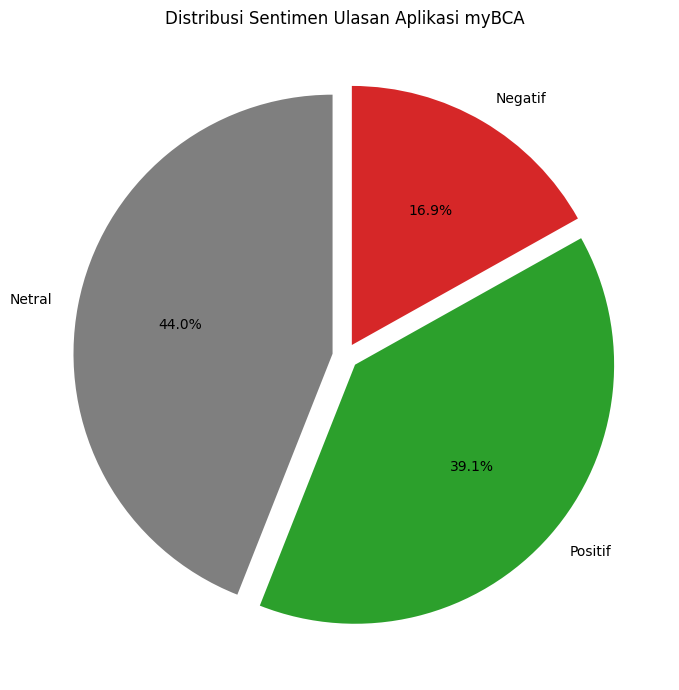

In [31]:
# Hitung ulang distribusi sentimen
sentiment_distribution = clean_df['sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
colors = ['tab:gray','tab:green','tab:red']  # Warna untuk Netral, Positif, Negatif
sentiment_distribution.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=sentiment_distribution.index,
    explode=(0.05, 0.05, 0.05), #keliatan 3d
)
plt.title('Distribusi Sentimen Ulasan Aplikasi myBCA')
plt.ylabel('')  # Menghilangkan label y
plt.tight_layout()
plt.show()

<ipython-input-32-8e7b471bff97>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


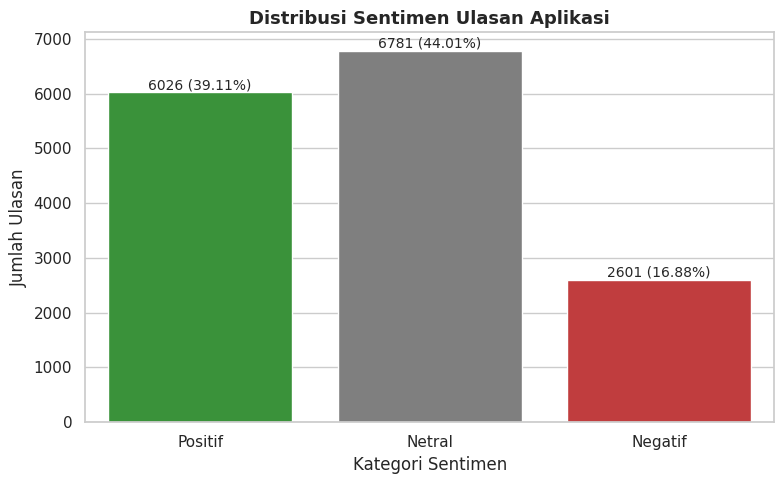

In [32]:
sns.set(style="whitegrid")

# Hitung jumlah tiap kelas sentimen
sentiment_order = ["Positif", "Netral", "Negatif"]
sentiment_counts = clean_df["sentiment"].value_counts().reindex(sentiment_order, fill_value=0)
sentiment_percent = (sentiment_counts / sentiment_counts.sum() * 100).round(2)

# Buat DataFrame gabungan untuk visualisasi
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['Sentimen', 'Jumlah']
sentiment_df['Persentase'] = sentiment_percent.values

# Plot batang
plt.figure(figsize=(8, 5))
colors = ['tab:green','tab:gray','tab:red']
bar = sns.barplot(
    data=sentiment_df,
    x="Sentimen",
    y="Jumlah",
    palette=colors
)

# Tambahkan label jumlah dan persentase di atas batang
for idx, row in sentiment_df.iterrows():
    bar.text(idx, row['Jumlah'] + 1, f"{row['Jumlah']} ({row['Persentase']}%)",
             ha='center', va='bottom', fontsize=10)

plt.title("Distribusi Sentimen Ulasan Aplikasi", fontsize=13, fontweight='bold')
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.tight_layout()
plt.show()


### **Word Cloud**

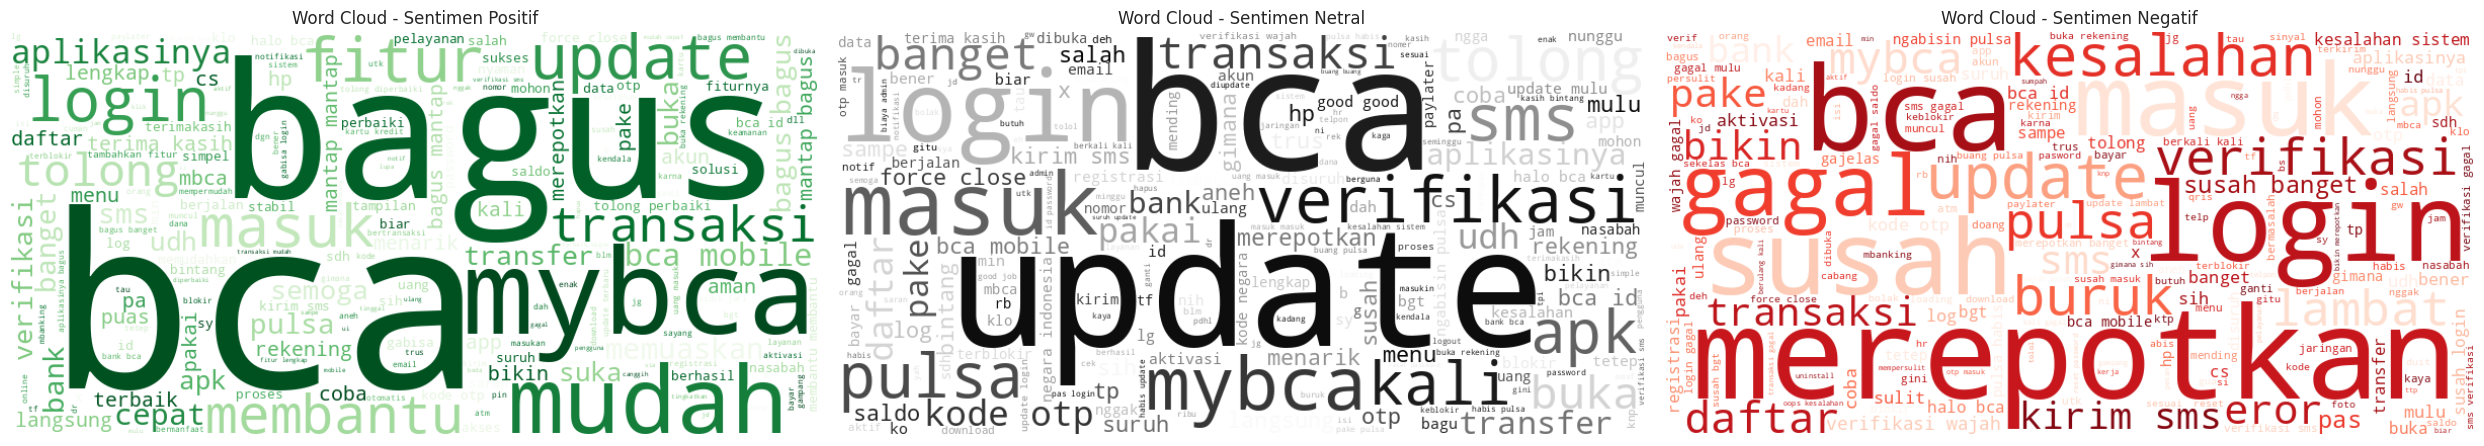

In [33]:
# Gunakan kolom yang sudah dihapus stopword-nya
text_positif = ' '.join(clean_df[clean_df['sentiment'] == 'Positif']["Final-TEKS"].dropna())
text_netral  = ' '.join(clean_df[clean_df['sentiment'] == 'Netral']["Final-TEKS"].dropna())
text_negatif = ' '.join(clean_df[clean_df['sentiment'] == 'Negatif']["Final-TEKS"].dropna())

# Buat WordCloud baru
wc_positif = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text_positif)
wc_netral  = WordCloud(width=800, height=400, background_color='white', colormap='gray').generate(text_netral)
wc_negatif = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_negatif)

# Tampilkan
plt.figure(figsize=(25, 25))

plt.subplot(1, 3, 1)
plt.imshow(wc_positif, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Positif')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wc_netral, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Netral')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wc_negatif, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Negatif')
plt.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-34-bc82265d0c2c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_kata_df, y="Kata", x="Jumlah", palette="Blues_d")


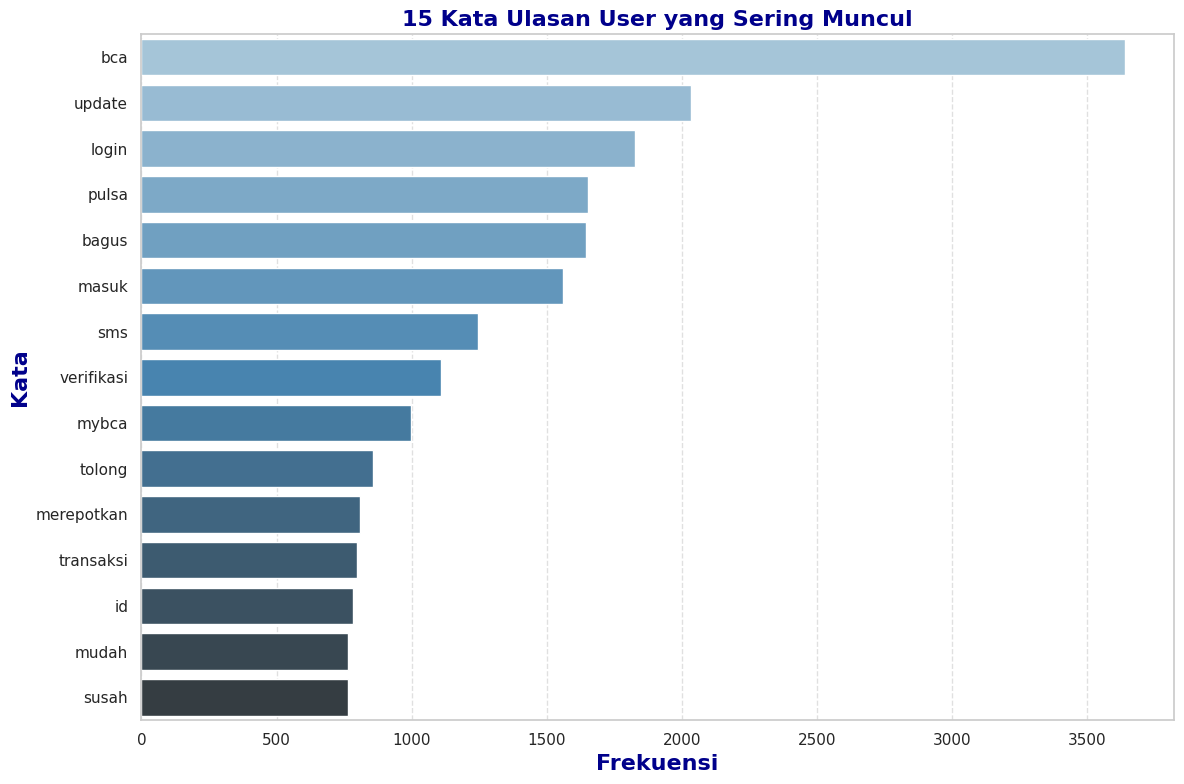

In [34]:
from collections import Counter
# Gabungkan semua ulasan menjadi satu teks panjang
teks_gabungan = " ".join(clean_df["Final-TEKS"].dropna().astype(str))

# Pisahkan menjadi list kata
daftar_kata = teks_gabungan.split()

# Hitung jumlah kemunculan setiap kata
frekuensi_kata = Counter(daftar_kata)

# 15 kata yang paling sering muncul
top_kata = frekuensi_kata.most_common(15)

# Konversi ke DataFrame
top_kata_df = pd.DataFrame(top_kata, columns=["Kata", "Jumlah"])

# Visualisasi dengan seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Menambahkan style grid putih
sns.barplot(data=top_kata_df, y="Kata", x="Jumlah", palette="Blues_d")

plt.title("15 Kata Ulasan User yang Sering Muncul", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Frekuensi", fontsize=16, fontweight="bold", color="darkblue")
plt.ylabel("Kata", fontsize=16, fontweight="bold", color="darkblue")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### **Data Splitting**

In [35]:
from sklearn.model_selection import train_test_split
# X berdasarkan kolom Final_teks dan y berdasarkan kolom sentiment
X = clean_df["Final-TEKS"]
y = clean_df["sentiment"]

# Split data: 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

### **Training Model menggunakan algoritma Machine Learning**

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# 1. Logistic Regression
model_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000)),
    ('clf', LogisticRegression(solver='liblinear'))
])

model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
print(" Algoritma Logistic Regression")
print(classification_report(y_test, pred_lr))
print("Akurasi:", accuracy_score(y_test, pred_lr))

 Algoritma Logistic Regression
              precision    recall  f1-score   support

     Negatif       0.86      0.78      0.81       520
      Netral       0.83      0.90      0.86      1357
     Positif       0.94      0.88      0.91      1205

    accuracy                           0.87      3082
   macro avg       0.87      0.85      0.86      3082
weighted avg       0.87      0.87      0.87      3082

Akurasi: 0.8718364698247891


In [40]:
# 2. Random Forest
model_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print("Algoritma Random Forest")
print(classification_report(y_test, pred_rf))
print("Akurasi:", accuracy_score(y_test, pred_rf))

Algoritma Random Forest
              precision    recall  f1-score   support

     Negatif       0.85      0.86      0.85       520
      Netral       0.88      0.90      0.89      1357
     Positif       0.94      0.91      0.92      1205

    accuracy                           0.90      3082
   macro avg       0.89      0.89      0.89      3082
weighted avg       0.90      0.90      0.90      3082

Akurasi: 0.8974691758598313


In [41]:
# 3. Support Vector Machine (SVM)
model_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000)),
    ('clf', SVC(kernel='linear'))
])

model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
print("Algoritma Support Vector Machine")
print(classification_report(y_test, pred_svm))
print("Akurasi:", accuracy_score(y_test, pred_svm))

Algoritma Support Vector Machine
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       520
      Netral       0.89      0.94      0.92      1357
     Positif       0.97      0.92      0.94      1205

    accuracy                           0.92      3082
   macro avg       0.92      0.90      0.91      3082
weighted avg       0.92      0.92      0.92      3082

Akurasi: 0.917910447761194


### **Evaluasi Model**

In [42]:
def evaluasi_model(nama_model, y_test, y_pred):
    print(f"Evaluasi Model: {nama_model}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Akurasi:", accuracy_score(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=sorted(y_test.unique()),
                yticklabels=sorted(y_test.unique()))
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title(f"Confusion Matrix - {nama_model}")
    plt.tight_layout()
    plt.show()

Evaluasi Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.86      0.78      0.81       520
      Netral       0.83      0.90      0.86      1357
     Positif       0.94      0.88      0.91      1205

    accuracy                           0.87      3082
   macro avg       0.87      0.85      0.86      3082
weighted avg       0.87      0.87      0.87      3082

Akurasi: 0.8718364698247891


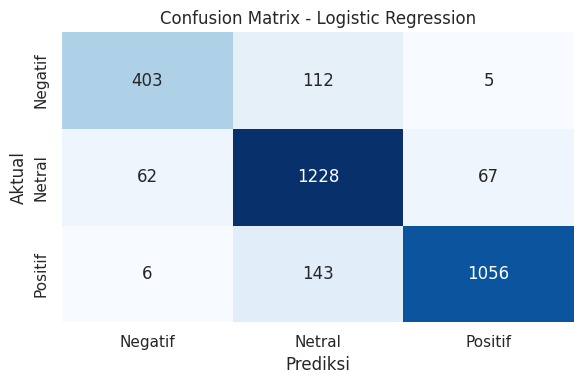

In [43]:
evaluasi_model("Logistic Regression", y_test, pred_lr)

Evaluasi Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.85      0.86      0.85       520
      Netral       0.88      0.90      0.89      1357
     Positif       0.94      0.91      0.92      1205

    accuracy                           0.90      3082
   macro avg       0.89      0.89      0.89      3082
weighted avg       0.90      0.90      0.90      3082

Akurasi: 0.8974691758598313


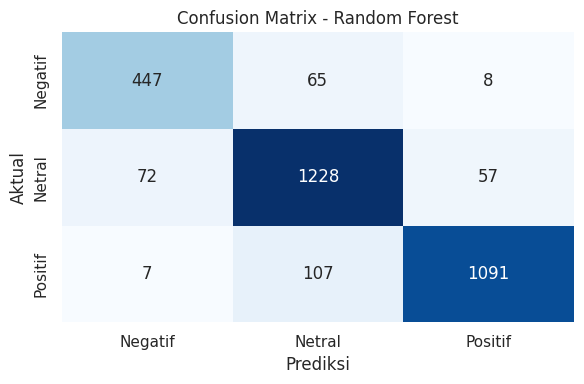

In [44]:
evaluasi_model("Random Forest", y_test, pred_rf)

Evaluasi Model: SVM
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       520
      Netral       0.89      0.94      0.92      1357
     Positif       0.97      0.92      0.94      1205

    accuracy                           0.92      3082
   macro avg       0.92      0.90      0.91      3082
weighted avg       0.92      0.92      0.92      3082

Akurasi: 0.917910447761194


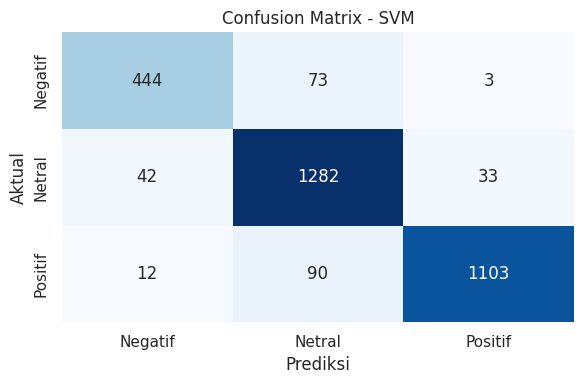

In [45]:
evaluasi_model("SVM", y_test, pred_svm)

### **Analisis**

### **Berdasarkan ke 3 model machine learning tersebut didapatkan analisis:**
1. Algoritma Logistic Regression

Akurasi yang didapatkan dari algoritma ini yaitu 87.18%. Berdasarkan performa cukup baik dan stabil di semua kelas. Kemudian algoritma ini juga ringan dan cepat untuk dilatih.

Kekurangannya adalah kurang untuk mengenali kelas Negatif (recall hanya 0.78),artinya masih ada banyak ulasan negatif yang salah ketika diklasifikasikan.

2. Algoritma Random Forest

Akurasi yang didapatkan dari algoritma ini yaitu 89.75%. Berdasarkan performa ada peningkatan dari algoritma Logistic Regression. Yaitu lebih baik dalam mendeteksi kelas Negatif (recall 0.86) dan Positif (recall 0.91).

Kekurangannya adalah kalo datasetnya banyak/besar pasti lebih lambat ketika proses latihnya dibandingkan algoritma Logistic Regression.

3. Algoritma Support Vector Machine (SVM)

Akurasi yang didapatkan dari algoritma ini yaitu 91.79%. Berdasarkan performa,
algoritma ini paling akurat di antara dua algoritma sebelumnya. Kemudian algorima ini sangat baik dalam mengenali semua kelas, terutama Positif (precision 0.97).



### **Kesimpulan dan Rekomendasi**

1. Jika ingin presisi terbaik untuk klasifikasi sentimen, algoritma SVM adalah salah satu pilihan paling optimal.
2. Jika ingin kompromi antara akurasi dan waktu komputasi, algoritma Random Forest adalah salah satu opsi.
3. Jika ingin model yang cepat dan mudah, algoritma Logistic Regression adalah opsi.